<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span><ul class="toc-item"><li><span><a href="#Load-packages" data-toc-modified-id="Load-packages-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Load packages</a></span></li><li><span><a href="#Load-dataset:-Groundwater-chemistry-South-Australia" data-toc-modified-id="Load-dataset:-Groundwater-chemistry-South-Australia-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Load dataset: Groundwater chemistry South Australia</a></span></li></ul></li><li><span><a href="#Clustering" data-toc-modified-id="Clustering-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Clustering</a></span><ul class="toc-item"><li><span><a href="#Preprocess-the-data" data-toc-modified-id="Preprocess-the-data-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Preprocess the data</a></span></li><li><span><a href="#Clustering-with-DBSCAN" data-toc-modified-id="Clustering-with-DBSCAN-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Clustering with DBSCAN</a></span></li></ul></li><li><span><a href="#Classification" data-toc-modified-id="Classification-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Classification</a></span><ul class="toc-item"><li><span><a href="#Prepare-dataset" data-toc-modified-id="Prepare-dataset-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Prepare dataset</a></span></li><li><span><a href="#Classify-with-Random-Forests" data-toc-modified-id="Classify-with-Random-Forests-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Classify with Random Forests</a></span></li><li><span><a href="#Nitrate-class-prediction-based-on-TDS-and-major-ions" data-toc-modified-id="Nitrate-class-prediction-based-on-TDS-and-major-ions-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Nitrate class prediction based on TDS and major ions</a></span></li></ul></li><li><span><a href="#Regression" data-toc-modified-id="Regression-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Regression</a></span></li><li><span><a href="#Dimensionality-reduction" data-toc-modified-id="Dimensionality-reduction-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Dimensionality reduction</a></span></li></ul></div>

# Introduction
## Load packages

In [1]:
# preamble
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import functions we'll need later
# allow interactive figures in notebook
# %matplotlib notebook

## Load dataset: Groundwater chemistry South Australia
Pandas can also read data directly from excel files, using [pd.read_excel](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html).
The dataset we are using is a dataset of groundwater chemistry of South Australia

[Gray, David J. and Bardwell, Nicole (2016) Hydrogeochemistry of South Australia: Data Release: Accompanying Notes. CSIRO, Australia. EP156116 34p](https://data.csiro.au/collections/collection/CIcsiro:17862v1)


In [2]:
fname = 'CSH_SA.xlsx'
sheet = 'Data'
chem = pd.read_excel(fname,sheet)
chem

,Drillhole,Date,Unit_No,Sample_No,CSIRO_No,Long,Lat,TDSc_mgL,pH,Eh_mV,...,18O_SMOW,2H_SMOW,Ra_BqL,13C_pmPDB,87Sr_rat,Alpha_BqL,Beta_BqL,14C_pmc,14C_age,222Rn_BqL
0,143,1941-07-18,473400001,97764,C00001,129.110034,-31.584249,159.870772,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,144,1941-07-18,473400002,1831820,C00002,129.346375,-31.521174,186.619224,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,146,1973-07-06,473400004,399452,C00003,129.385055,-31.640240,30817.910000,7.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,147,1973-06-30,473400005,1831822,C00004,129.157832,-31.665696,19035.280000,7.5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,147,1973-07-21,473400005,399459,C00005,129.157832,-31.665696,18970.360000,7.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32292,276087,2013-02-26,653102002,2026137,C32338,138.008903,-33.159667,11192.837466,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32293,276089,2013-02-26,653102004,2026138,C32339,138.007531,-33.159979,40829.201102,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32294,276091,2013-02-26,653102006,2026135,C32340,138.011364,-33.160587,21575.757576,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32295,276092,2013-02-27,653102007,2026136,C32341,138.010962,-33.161361,26115.702479,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Clustering
Cluster the data based on Alkalinity and TDS
## Preprocess the data

c:\Users\PRI258\Anaconda3\envs\geopandas_env\lib\site-packages\pandas\core\internals\blocks.py:351: RuntimeWarning: divide by zero encountered in log10
  result = func(self.values, **kwargs)


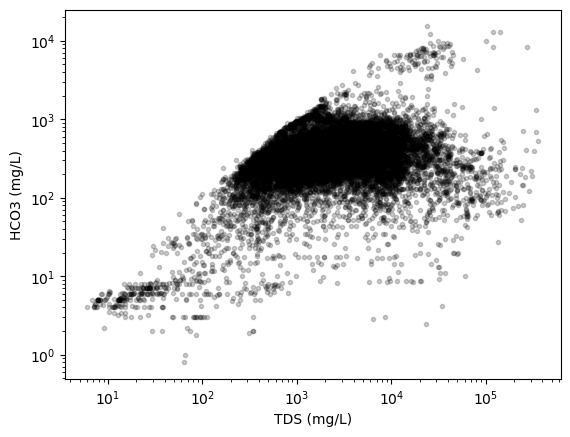

In [3]:
TDSHCO3 = chem[['TDSc_mgL','HCO3_mgL']].dropna() #only select TDS & HCO3, drop any rows with missing values
plt.figure()
plt.loglog(TDSHCO3['TDSc_mgL'],TDSHCO3['HCO3_mgL'],'.k',alpha=0.2)
plt.xlabel('TDS (mg/L)')
plt.ylabel('HCO3 (mg/L)')
TDSHCO3_l = np.log10(TDSHCO3) #log10 transform

In [13]:
TDSHCO3_l

,TDSc_mgL,HCO3_mgL
0,2.203769,2.210811
1,2.270956,2.180581
2,4.488803,2.201397
3,4.279559,2.434569
4,4.278076,2.421604
...,...,...
32284,3.433370,2.176091
32285,3.558409,2.397940
32286,3.456079,2.712429
32287,3.684425,2.621383


## Clustering with DBSCAN

Estimated number of clusters: 6
Estimated number of noise points: 342


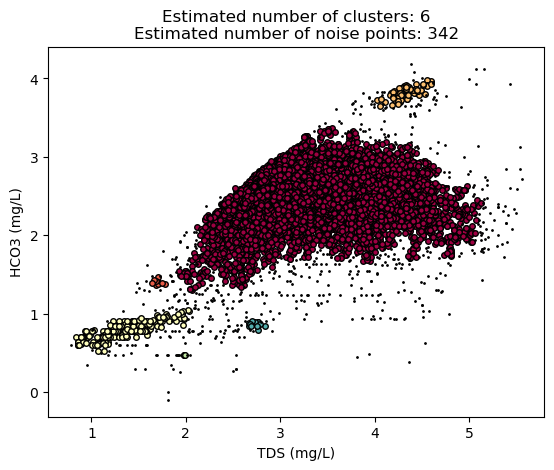

In [4]:
from sklearn.cluster import DBSCAN
X = np.array(TDSHCO3_l) #convert to numpy array
X = X[~np.isinf(X).any(axis=1)] # remove -inf values
db = DBSCAN(eps=0.1, min_samples=10).fit(X)
labels = db.labels_
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
plt.figure()
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=4,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=1,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}\nEstimated number of noise points: {n_noise_}")
plt.xlabel('TDS (mg/L)')
plt.ylabel('HCO3 (mg/L)')
plt.show()

# Classification
Classify samples according to salinity category. Use major ions to estimate class.
## Prepare dataset

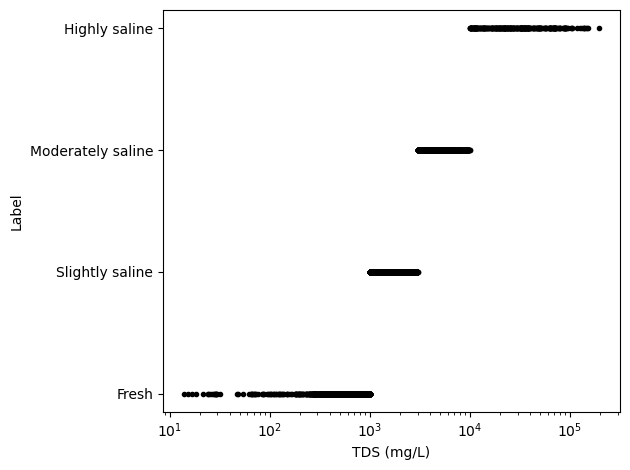

In [5]:
# select variables
sal = chem[['TDSc_mgL','HCO3_mgL','Na_mgL','K_mgL','Mg_mgL','Ca_mgL','Cl_mgL','SO4_mgL','NO3N_mgL']].dropna()
# create labels based on TDS
def classifier(row):
    if row["TDSc_mgL"] <= 1000:
        return 1
    elif (row["TDSc_mgL"] > 1000) and (row["TDSc_mgL"] <= 3000):
        return 2
    elif (row["TDSc_mgL"] > 3000) and (row["TDSc_mgL"] <= 10000):
        return 3
    else:
        return 4
sal['class'] = sal.apply(classifier, axis=1)
# check labels
plt.figure()
plt.semilogx(sal['TDSc_mgL'],sal['class'],'.k')
plt.xlabel('TDS (mg/L)')
plt.ylabel('Label')
plt.yticks(np.arange(1,5),['Fresh','Slightly saline','Moderately saline', 'Highly saline'])
plt.tight_layout()

It is not trivial to predict the salinity class based on major ion composition.

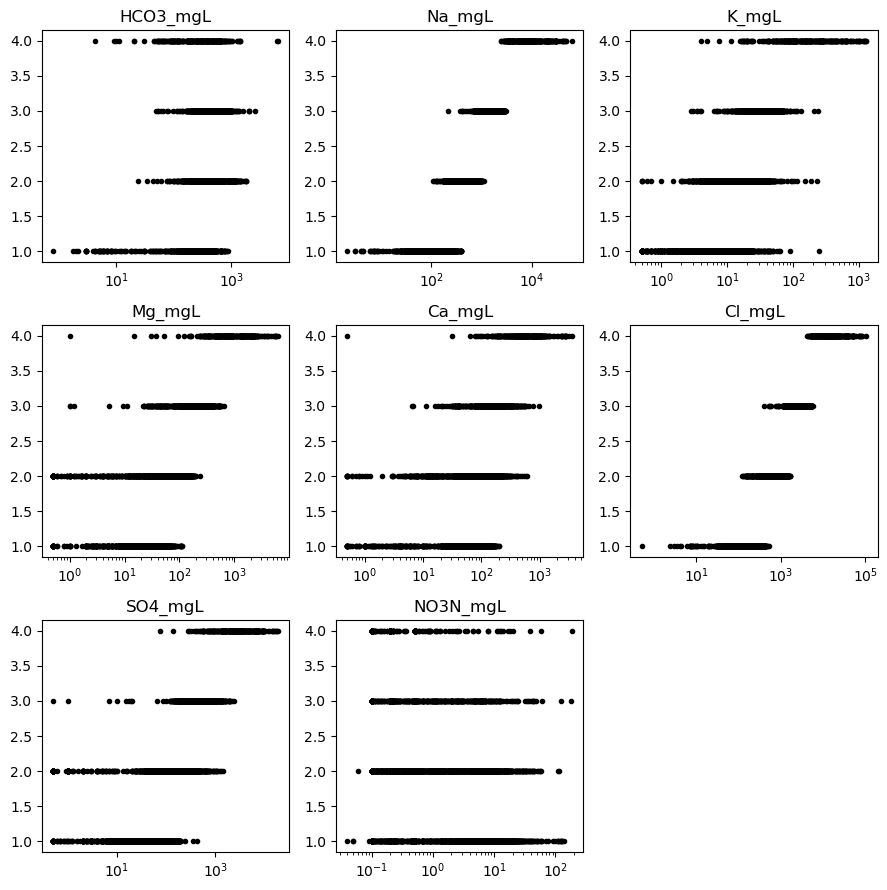

In [6]:
plt.figure(figsize=(9,9))
for i,ion in enumerate(['HCO3_mgL','Na_mgL','K_mgL','Mg_mgL','Ca_mgL','Cl_mgL','SO4_mgL','NO3N_mgL']):
    plt.subplot(3,3,i+1)
    plt.semilogx(sal[ion],sal['class'],'.k')
    plt.title(ion)
plt.tight_layout()

## Classify with Random Forests
To train a random forest classifier, we need to split the dataset into a training dataset and a validation dataset. Here I chose to use the first 4500 samples to train the classifier. The remainder of the dataset (~1000 samples) is used for validation.

In [7]:
from sklearn.ensemble import RandomForestClassifier
X = np.array(sal[['HCO3_mgL','Na_mgL','K_mgL','Mg_mgL','Ca_mgL','Cl_mgL','SO4_mgL','NO3N_mgL']])
Y = np.array(sal['class'])
X_tr = X[0:4500,:]
Y_tr = Y[0:4500]
X_val = X[4500::,:]
Y_val = Y[4500::]
clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(X_tr, Y_tr)
val = clf.predict(X_val)
# compute a summary table with the count of correctly and incorrectly classified samples
conf = np.zeros((4,4))
for i in np.arange(1,5):
    for j in np.arange(1,5):
        conf[i-1,j-1]=np.sum((Y_val==i)&(val==j))
conff = pd.DataFrame(conf,columns=['RF fresh','RF slightly saline','RF moderately saline', 'RF highly saline'],
                     index=['Fresh','Slightly saline','Moderately saline', 'Highly saline'])
conff

,RF fresh,RF slightly saline,RF moderately saline,RF highly saline
Fresh,323.0,11.0,0.0,0.0
Slightly saline,7.0,376.0,6.0,0.0
Moderately saline,0.0,7.0,103.0,0.0
Highly saline,0.0,0.0,3.0,149.0


## Nitrate class prediction based on TDS and major ions
Let's try to do a similar exercise, but now label the dataset based on the nitrate concentration.

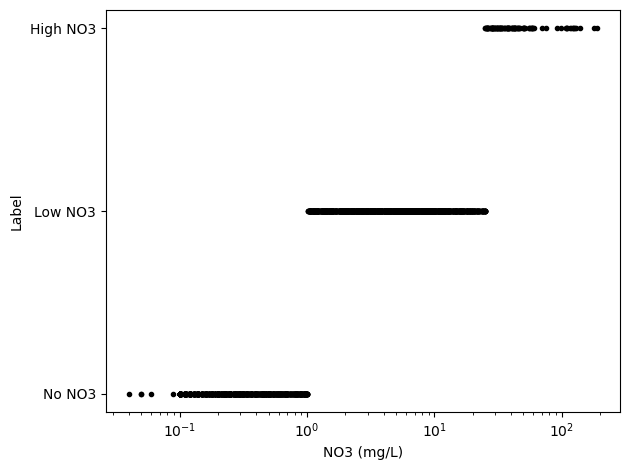

In [8]:
# create labels based on Nitrate
def classifier(row):
    if row["NO3N_mgL"] <= 1:
        return 1
    elif (row["NO3N_mgL"] > 1) and (row["NO3N_mgL"] <= 25):
        return 2
    else:
        return 3
sal['classNO3'] = sal.apply(classifier, axis=1)
# check labels
plt.figure()
plt.semilogx(sal['NO3N_mgL'],sal['classNO3'],'.k')
plt.xlabel('NO3 (mg/L)')
plt.ylabel('Label')
plt.yticks(np.arange(1,4),['No NO3','Low NO3','High NO3'])
plt.tight_layout()

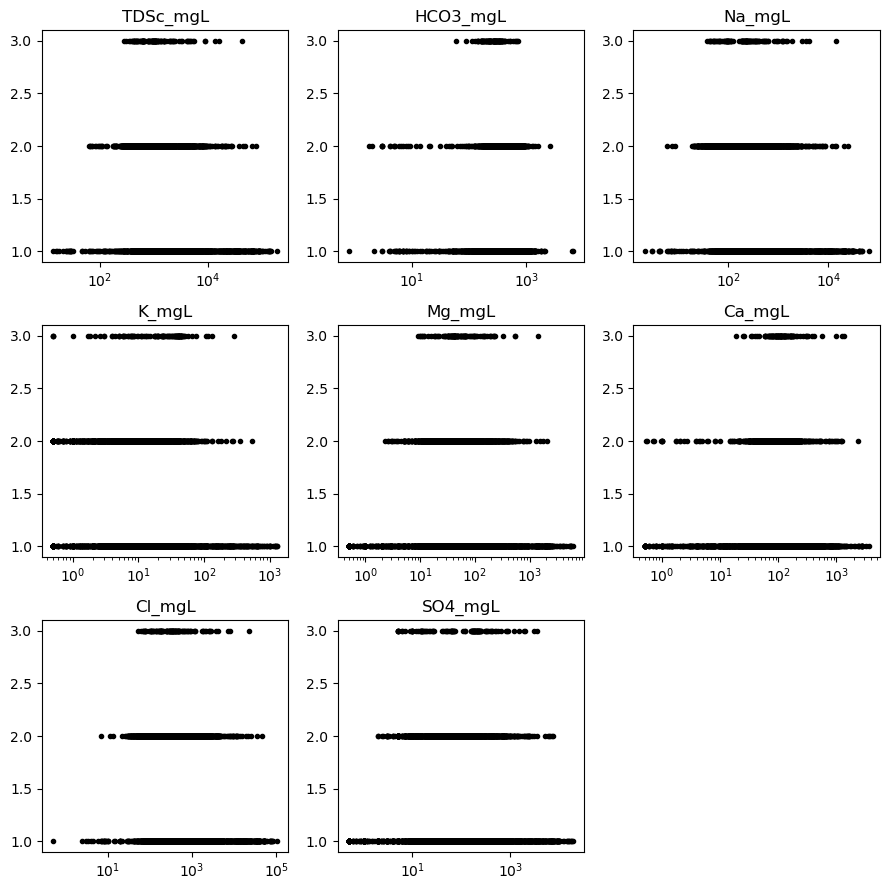

In [9]:
plt.figure(figsize=(9,9))
for i,ion in enumerate(['TDSc_mgL','HCO3_mgL','Na_mgL','K_mgL','Mg_mgL','Ca_mgL','Cl_mgL','SO4_mgL']):
    plt.subplot(3,3,i+1)
    plt.semilogx(sal[ion],sal['classNO3'],'.k')
    plt.title(ion)
plt.tight_layout()

In [10]:
X = np.array(sal[['TDSc_mgL','HCO3_mgL','Na_mgL','K_mgL','Mg_mgL','Ca_mgL','Cl_mgL','SO4_mgL']])
Y = np.array(sal['classNO3'])
X_tr = X[0:4500,:]
Y_tr = Y[0:4500]
X_val = X[4500::,:]
Y_val = Y[4500::]
clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(X_tr, Y_tr)
val = clf.predict(X_val)
# compute a summary table with the count of correctly and incorrectly classified samples
conf = np.zeros((3,3))
for i in np.arange(1,4):
    for j in np.arange(1,4):
        conf[i-1,j-1]=np.sum((Y_val==i)&(val==j))
conff = pd.DataFrame(conf,columns=['RF no NO3','RF low NO3','RF high NO3'],
                     index=['no NO3','low NO3','high NO3'])
conff

,RF no NO3,RF low NO3,RF high NO3
no NO3,646.0,62.0,19.0
low NO3,145.0,95.0,4.0
high NO3,7.0,7.0,0.0


# Regression
Instead of predicting classes of salinity, let's try to predict salinity based on major ions.

Text(0, 0.5, 'Modelled TDS (mg/L)')

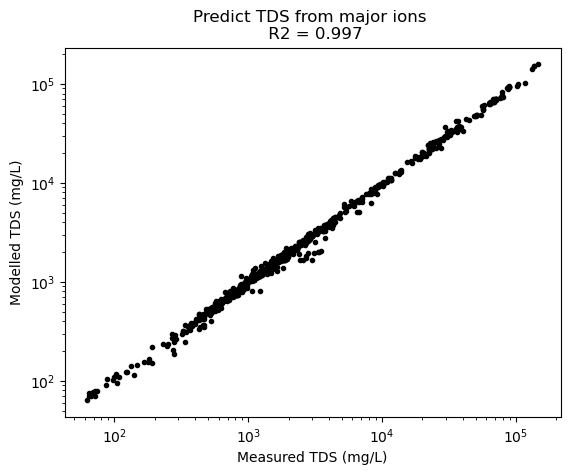

In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

X = np.array(sal[['HCO3_mgL','Na_mgL','K_mgL','Mg_mgL','Ca_mgL','Cl_mgL','SO4_mgL','NO3N_mgL']])
Y = np.log10(np.array(sal['TDSc_mgL']))
X_tr = X[0:4500,:]
Y_tr = Y[0:4500]
X_val = X[4500::,:]
Y_val = Y[4500::]

clf = RandomForestRegressor(n_estimators=50)
clf = clf.fit(X_tr, Y_tr)
val = clf.predict(X_val)
r2 = r2_score(Y_val,val)
plt.figure()
plt.loglog(10**Y_val,10**val,'.k')
plt.title(f'Predict TDS from major ions \n R2 = {r2:4.3f}')
plt.xlabel('Measured TDS (mg/L)')
plt.ylabel('Modelled TDS (mg/L)')

In [ ]:
from sklearn.ensemble import RandomForestRegressor

X = np.array(sal[['TDSc_mgL','HCO3_mgL','Na_mgL','K_mgL','Mg_mgL','Ca_mgL','Cl_mgL','SO4_mgL']])
Y = np.array(sal['NO3N_mgL'])
X_tr = X[0:4500,:]
Y_tr = Y[0:4500]
X_val = X[4500::,:]
Y_val = Y[4500::]

clf = RandomForestRegressor(n_estimators=50)
clf = clf.fit(X_tr, Y_tr)
val = clf.predict(X_val)
r2 = r2_score(Y_val,val)

plt.figure()
plt.plot(Y_val,val,'.k')
plt.title(f'Predict NO3 from major ions \n R2 = {r2:4.3f}')
plt.xlabel('Measured NO3 (mg/L)')
plt.ylabel('Modelled NO3 (mg/L)')

# Dimensionality reduction

In [12]:
cols = ['Lat','Long','TDSc_mgL', 'pH', 'HCO3_mgL', 'Na_mgL', 'K_mgL', 'Mg_mgL', 'Ca_mgL', 'Cl_mgL', 'SO4_mgL','NO3N_mgL']
dat = chem[cols].dropna()
dat

,Lat,Long,TDSc_mgL,pH,HCO3_mgL,Na_mgL,K_mgL,Mg_mgL,Ca_mgL,Cl_mgL,SO4_mgL,NO3N_mgL
8,-26.659344,129.371098,1465.613547,6.96,349.007239,301.0,35.6,89.0,126.0,446.0,297.0,18.075029
25,-26.188945,129.399499,791.340000,8.00,426.000000,137.0,2.6,87.0,53.0,174.0,129.0,17.397215
34,-26.166874,129.132902,700.390000,8.20,461.000000,111.0,3.5,105.0,20.0,185.0,50.0,5.874384
40,-26.160120,129.121221,657.880000,8.10,432.000000,112.0,5.2,71.0,46.0,163.0,49.0,7.139636
41,-26.160120,129.121221,639.520000,7.60,418.000000,106.0,2.7,71.0,43.0,160.0,52.0,6.970000
...,...,...,...,...,...,...,...,...,...,...,...,...
32277,-33.667646,136.641977,8542.148760,6.72,475.894921,2460.0,69.8,392.0,179.0,4100.0,690.0,2.711254
32278,-30.466436,135.321646,1735.149429,7.37,260.917202,421.0,25.8,46.1,94.4,820.0,200.0,16.041588
32283,-29.999119,135.150827,2497.400000,8.00,160.000000,610.0,40.0,89.0,160.0,1100.0,420.0,29.000000
32286,-34.142167,135.306513,2858.111722,7.12,515.738208,767.0,22.4,112.0,164.0,1400.0,140.0,2.485316


As we've seen before, the data are very skewed. Before doing any multivariate data analysis it is therefore recommended to normalise data. This is often done by rescaling all variables so their range falls between 0 and 1 or by transforming the variables by subtracting the mean and dividing by the standard deviation. We used log transform earlier for skewed data. This has some drawbacks, especially if there are 0s in the dataset.

Another way to normalise data is to calculate the rank, i.e. the position if you were to rank them from smallest to largest. This can be easily done wiith the `rankdata` function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rankdata.html).

In [13]:
from scipy.stats import rankdata
# calculate rank of data
dr = rankdata(np.array(dat[cols[2::]]),axis=0)
dr

array([[2344. ,  613. , 1731. , ..., 1878.5, 3310. , 4161. ],
       [1050. , 3915. , 2721.5, ...,  652. , 2530. , 4149. ],
       [ 778. , 4117. , 3070.5, ...,  712. , 1230.5, 3643.5],
       ...,
       [3221. , 3915. ,  272.5, ..., 3228. , 3567. , 4242.5],
       [3335. , 1288. , 3383. , ..., 3415. , 2637.5, 3216. ],
       [3727. , 4033. , 2615. , ..., 3769. , 3265.5, 2727. ]])

Here we'll look into dimensionality reduction and manifold learning. The goal is to find a representation of the data in 2D such that samples that are similar are plotted close to each other and samples that are very different are plotted far apart. The [manifold learning page](https://scikit-learn.org/stable/modules/manifold.html#manifold) gives an overview of methods you can use. The method we'll be using is [t-distributed Stochastic Neighbor Embedding](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html#sklearn.manifold.TSNE).

We need to import the function from scikit learn, specify the parameters and then train the algorithm with our dataset:

In [14]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, init='pca')
X = tsne.fit_transform(dr)

The result is a 2D numpy array with an x and y coordinate for each sample. We can visualise this with `plt.scatter` and color the plot with the rank of each of the variables:

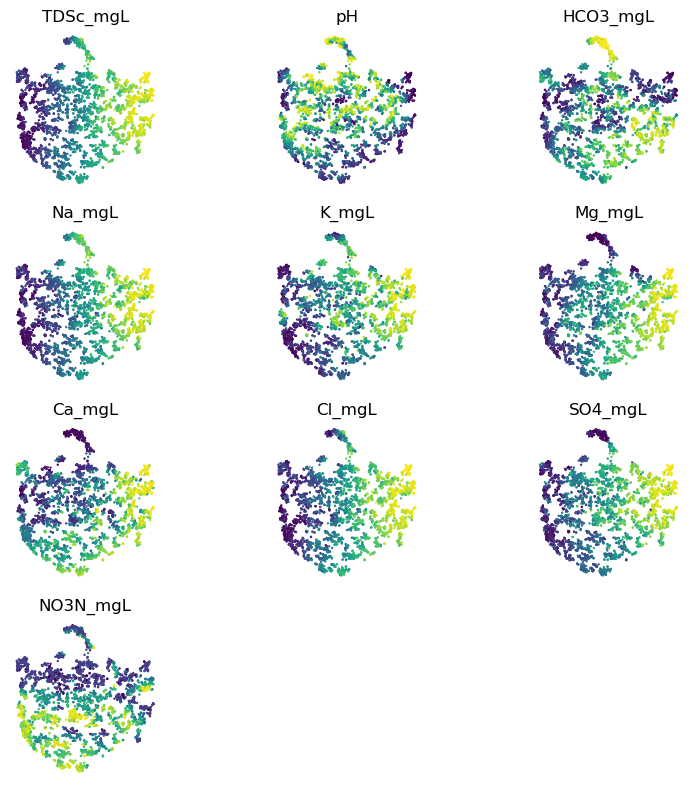

In [15]:
fig = plt.figure(figsize=(8,8))
for i,col in enumerate(cols[2::]):
    ax = plt.subplot(4,3,i+1, aspect=1)
    ax.scatter(X[:,0],X[:,1],0.5,dr[:,i],cmap='viridis')
    ax.set_title(col)
    ax.set_axis_off()
plt.tight_layout()

This is a spatial dataset, so we want to know show this information on a map. I've developed a 2D perceptually colormap that can be used to assign a unique color to each sample, based on the coordinates of the TSNE projection:

In [16]:
def percuniform_rgb(x,y):
    '''
    Create RGB values for x,y positions from perceptually uniform colour scheme
    IN:
        x: [nx1] array of x values
        y: [nx1] array of y values
    OUT:
        rgb: [nx3] array of rgb values
    '''
    # rescale cartesian coordinates into range [-1,1]
    # normalise based on max(range(x),range(y))
    # multiply by 2 and subtract 1 to have data 
    # - centered on [0,0] 
    # - x and y each in range [-1,1]
    range_x = x.max()-x.min()
    range_y = y.max()-y.min()
    range_m = max(range_x,range_y)
    x_s = 2*((x-x.min())/range_m)-1
    y_s = 2*((y-y.min())/range_m)-1
    # load spline interpolant of colour scheme
    rgb_interp = np.load('BivariateColourScheme.npy', allow_pickle=True, encoding='latin1').item()
    # interpolate rgb values
    rgb = np.zeros((len(x),3))
    for i,col in enumerate(['R','G','B']):
        rgb[:,i] = np.clip(rgb_interp[col].ev(x_s,y_s),0,1)
    return(rgb)

In [17]:
tsnergb = percuniform_rgb(X[:,0],X[:,1])

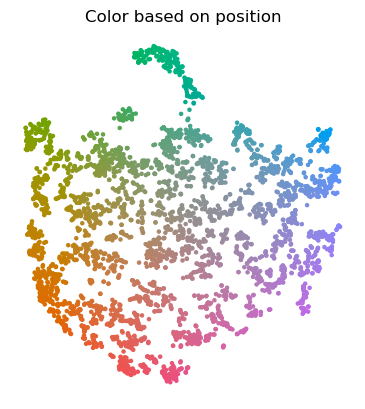

In [18]:
fig,ax = plt.subplots()
ax.scatter(X[:,0],X[:,1],5,tsnergb)
ax.set_aspect('equal')
ax.set_title('Color based on position')
ax.set_axis_off()

We can now make a map of the samples, where each sample is colored based on its location in the TSNE plot

Text(0, 0.5, 'Latitude')

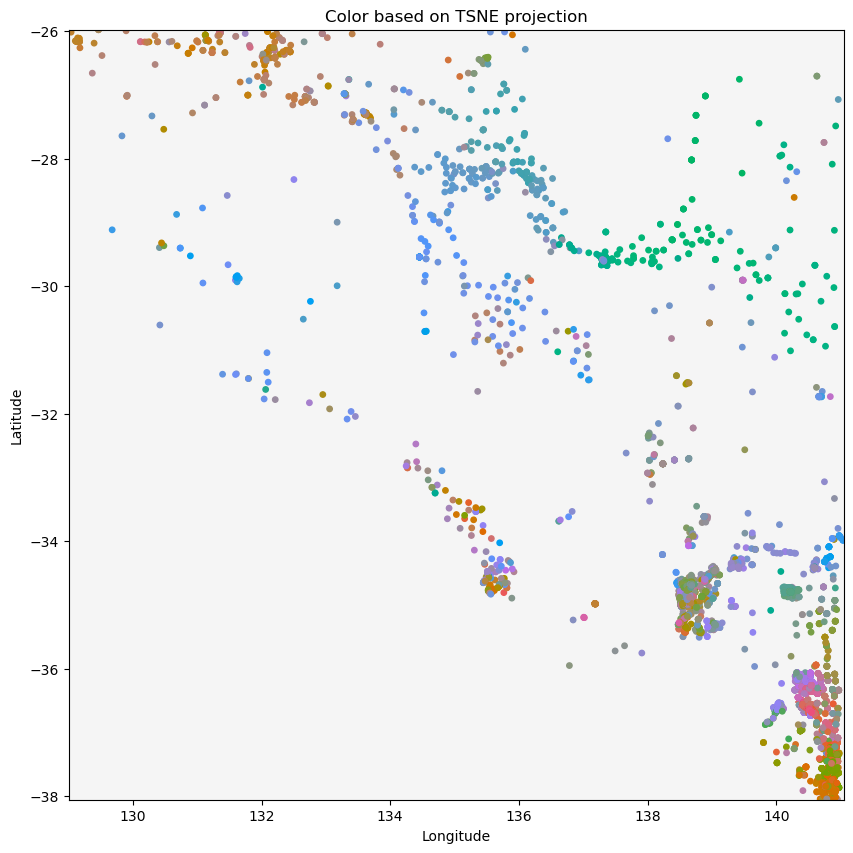

In [19]:

fig,ax = plt.subplots()
# modify the default figure size
fig.set_size_inches(10,10)
ax.set_facecolor("whitesmoke")
ax.set_title('Color based on TSNE projection')
# zoom in to SA data
ax.set_xlim(chem['Long'].min(),chem['Long'].max())
ax.set_ylim(chem['Lat'].min(),chem['Lat'].max())
# use scatter to plot point with color based on recharge
s = ax.scatter(dat['Long'],dat['Lat'],15,tsnergb)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')